<a href="https://colab.research.google.com/github/bulutirm/NonlinearRegressionModels/blob/main/GY_ML_301_DogrusalOlmayanRegresyonModelleri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doğrusal Olmayan Regresyon Modelleri


> # K En Yakın Komşu

Gözlemlerin birbirine olan benzelikleri üzerinden tahmin yapılır.

*   Sınıflandırma ya da regresyon problemlerinde kullanılabilen algoritmadır.
*   Parametrik olmayan bir öğrenme türüdür.

> Bağımsız değişken değerleri verilen gözlem biriminin bağımlı değişken değeri "y" değerini tahmin etmek için gözlem birimlerinin tablodaki diğer gözlem birimleriyle olan benzerlikleri hesaplanacaktır.

> Ve bu benzrlikler üzerinden ilgili gözlem birimimize tablodaki gözlem birimlerinden hangisi en yakın ise ilgili gözlem biriminin değişkeni olan "y" tahmin edilmiş olacaktır.

*  Öklid ya da benzeri bir uzaklık hesabı ile her bir gözleme uzaklık hesaplanır.
*  En yakın K adet gözlemin y değerlerinin ortalamsı alınır.

**KNN Basamakları**
* Komşu sayısını belirle (K)
* Bilinmeyen nokta ile diğer tüm noktalar ile arasındaki uzaklıkları hesapla.
* Uzaklıkları sıralı ve belirlenen k sayısına göre en yakın olan k gözlemi seç.
* Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver.








In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

**KNN**

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1



> **Model**



In [ ]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
knn_model

KNeighborsRegressor()

In [ ]:
knn_model.n_neighbors

5

In [ ]:
knn_model.metric

'minkowski'

In [ ]:
dir(knn_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate_params',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params

**Tahmin**

In [ ]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

**Model Tuning**

In [ ]:
knn_model

KNeighborsRegressor()

In [ ]:
RMSE = []

for k in range(10):
  k = k+1
  knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  RMSE.append(rmse)
  print("k=", k, "için RMSE değeri:", rmse)

k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [ ]:
#GridSearchCV

In [ ]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [ ]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598


>  # Destek Vektör Regresyonu

Güçlü ve esnek modeltekniklerinden birisidir. Sınfılandırma ve regresyon için kullanılabilir. Robust (dayanıklı) bir regresyon modelleme tekniğidir.

**Amaç:** Bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğri belirlemektir.


**Model ve Tahmin**

In [ ]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [ ]:
svr_model

SVR(kernel='linear')

In [ ]:
svr_model.predict(X_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [ ]:
svr_model.predict(X_test)[0:5]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421])

In [ ]:
svr_model.intercept_

array([-80.15196063])

In [ ]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [ ]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

370.0408415795005

**Model Tuning**

In [ ]:
svr_model = SVR(kernel = "linear")

In [ ]:
svr_model

SVR(kernel='linear')

In [ ]:
svr_params = {"C": [0.1, 0.5, 1, 3]}

In [ ]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5).fit(X_train, y_train)

In [ ]:
svr_cv_model.best_params_

{'C': 0.5}

In [ ]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
svr_tuned = SVR(kernel = "linear", C = 0.5).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.98747616655294



> # Yapay Sinir Ağları

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

**Amaç :** En küçük hata ile tahmin yapabilecek katsayılara erişmektir.

**YSA Basamakaları**


*   Örnek veri seti toplanır.
*   Ağın topolojik yapısına karar verilir.
*   Ağda bulunan ağırlıklara başlangıç değeri atanır.
*   Örnek veri seti ağa sunulur.
*   İleri hesaplama işlemleri yapılır.
*   Gerçek çıktılar ile tahmin çıktıları karşılaştırılır. Öğrenmenin tamamnlaması basamakları gerçekleştirilir.


**Model ve Tahmin**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [ ]:
mlp_model

MLPRegressor()

In [ ]:
mlp_model.predict(X_test_scaled)[0:5]

array([19.70404368, 36.31345704, 60.93151304, 11.83848674, 23.60944559])

In [ ]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))


662.7563927421339

**Model Tuning**

In [ ]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
              "hidden_layer_sizes": [(10,20), (5,5), (100,100)]}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [ ]:
mlp_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}

In [ ]:
#final
mlp_tuned = MLPRegressor(alpha = 0.001, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.7014245766971



> # CART

**Amaç:** Veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.

Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

> Karar ağacında görülen her bir sayı, yaprağın bulunduğu bölgeye karşılık gelen yanıt değişkeninin ortalamasıdır.

**Model ve Tahmin**

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
#model
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [ ]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

Text(0, 0.5, 'Maaş (Salary)')

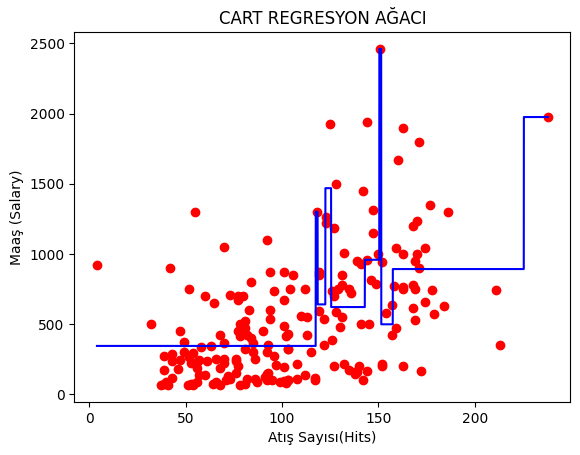

In [ ]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color = 'red')

plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')

plt.title('CART REGRESYON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)')

In [ ]:
#tek değişken tahmin
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [ ]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [ ]:
#tüm değişkenler
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [ ]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

**Model Tuning**

In [ ]:
cart_model

DecisionTreeRegressor()

In [ ]:
cart_model = DecisionTreeRegressor(max_depth = 5).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

448.21200029739276

In [ ]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=5)
File:        /usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

    .. versionadded:: 0.24
        Poisson deviance criterion.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_weight_fraction_leaf : float, default=0.0
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.

max_features : int, float or {"auto", "sqrt", "log2"}, default=None
    The number of features to consider when looking for the best split:

    - If int, then consider `max_features` features at each split.
    - If float, then `max_features` is a fraction and
      `max(1, int(max_features * n_features_in_))` features are considered at each
      split.
    - If "auto", then `max_features=n_features`.
    - If "sqrt", then `max_features=sqrt(n_features)`.
    - If "log2", then `max_features=log2(n_features)`.
    - If None, then `max_features=n_features`.

    .. deprecated:: 1.1
        The `"auto"` option was deprecated in 1.1 and will be removed
        in 1.3.

    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.

random_state : int, RandomState instance or None, default=None
    Controls the randomness of the estimator. The features are always
    randomly permuted at each split, even if ``splitter`` is set to
    ``"best"``. When ``max_features < n_features``, the algorithm will
    select ``max_features`` at random at each split before finding the best
    split among them. But the best found split may vary across different
    runs, even if ``max_features=n_features``. That is the case, if the
    improvement of the criterion is identical for several splits and one
    split has to be selected at random. To obtain a deterministic behaviour
    during fitting, ``random_state`` has to be fixed to an integer.
    See :term:`Glossary <random_state>` for details.

max_leaf_nodes : int, default=None
    Grow a tree with ``max_leaf_nodes`` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.

min_impurity_decrease : float, default=0.0
    A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.

    The weighted impurity decrease equation is the following::

        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)

    where ``N`` is the total number of samples, ``N_t`` is the number of
    samples at the current node, ``N_t_L`` is the number of samples in the
    left child, and ``N_t_R`` is the number of samples in the right child.

    ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
    if ``sample_weight`` is passed.

    .. versionadded:: 0.19

ccp_alpha : non-negative float, default=0.0
    Complexity parameter used for Minimal Cost-Complexity Pruning. The
    subtree with the largest cost complexity that is smaller than
    ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
    :ref:`minimal_cost_complexity_pruning` for details.

    .. versionadded:: 0.22

Attributes
----------
feature_importances_ : ndarray of shape (n_features,)
    The feature importances.
    The higher, the more important the feature.
    The importance of a feature is computed as the
    (normalized) total reduction of the criterion brought
    by that feature. It is also known as the Gini importance [4]_.

    Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.

max_features_ : int
    The inferred value of max_features.

n_features_in_ : int
    Number of features seen during :term:`fit`.

    .. versionadded:: 0.24

feature_names_in_ : ndarray of shape (`n_features_in_`,)
    Names of features seen during :term:`fit`. Defined only when `X`
    has feature names that are all strings.

    .. versionadded:: 1.0

n_outputs_ : int
    The number of outputs when ``fit`` is performed.

tree_ : Tree instance
    The underlying Tree object. Please refer to
    ``help(sklearn.tree._tree.Tree)`` for attributes of Tree object and
    :ref:`sphx_glr_auto_examples_tree_plot_unveil_tree_structure.py`
    for basic usage of these attributes.

See Also
--------
DecisionTreeClassifier : A decision tree classifier.

Notes
-----
The default values for the parameters controlling the size of the trees
(e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
unpruned trees which can potentially be very large on some data sets. To
reduce memory consumption, the complexity and size of the trees should be
controlled by setting those parameter values.

References
----------

.. [1] https://en.wikipedia.org/wiki/Decision_tree_learning

.. [2] L. Breiman, J. Friedman, R. Olshen, and C. Stone, "Classification
       and Regression Trees", Wadsworth, Belmont, CA, 1984.

.. [3] T. Hastie, R. Tibshirani and J. Friedman. "Elements of Statistical
       Learning", Springer, 2009.

.. [4] L. Breiman, and A. Cutler, "Random Forests",
       https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

Examples
--------
>>> from sklearn.datasets import load_diabetes
>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.tree import DecisionTreeRegressor
>>> X, y = load_diabetes(return_X_y=True)
>>> regressor = DecisionTreeRegressor(random_state=0)
>>> cross_val_score(regressor, X, y, cv=10)
...                    # doctest: +SKIP
...
array([-0.39..., -0.46...,  0.02...,  0.06..., -0.50...,
       0.16...,  0.11..., -0.73..., -0.30..., -0.00...])

In [ ]:
cart_params = {"max_depth": [2,3,4,5,10,20],
               "min_samples_split": [2,10,5,30,50,10]}

In [ ]:
cart_model = DecisionTreeRegressor()

In [ ]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [ ]:
cart_cv_model.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [ ]:
#final model

In [ ]:
cart_tuned = DecisionTreeRegressor(max_depth = 2, min_samples_split = 2).fit(X_train, y_train)                                                                             

In [ ]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

430.81036420947464


> # Random Forests

Topluluk öğrenme yöntemleri: Birden fazla algoritmanınya da birden fazla ağacın bir araya gelerek toplu bir şekilde öğrenmesi ve tahmin etmeye çalışmasıdır.

**Bagging:** Temeli bootstrapt yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

* Aşırı öğrenme problemi -> Budama çözümü

* T adet ağaç için n'er adet gözlem (n>m) bootstrap yöntemi ile seçilir. 
* T adet karar ağacı modelinin ürettiği T adet tahmin değerini bir araya getir.

* Çalışma prensibinin kilit noktası, bootstrap rastgele örnekleme yöntemidir.
* Bootstrap rastgele örnekleme yöntemi, gözlem birimlerinin içinden yerine koymalı bir şekilde tekrar tekrar örnek çekmek demektir.

* Bagging Yöntemi: Hata kareler ortalamasının karekökü değerini düşürür. Doğru sınıflandırma oranını arttırır. Varyansı düşürür ve ezberlemeye karşı dayanıklıdır.

Temeli birden çok karar ağacın ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

* Bagging ile Random Subspace yöntemlerinin birleşimi ile oluşturulmuştur.

* Ağaçlar için gözlemler bootstrap rastgele örnek seçimi yöntemi ile değişkenler random subspace yöntemi ile seçilir.

* Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.

* Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken önemini belirlenmesi için kullanılır.

* Her düğüm noktasında rastgele değişken seçimi yapılır. (regresyonda p/3, sınıflamada karekök p)

**Model ve Tahmin**


In [ ]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [ ]:
rf_model

RandomForestRegressor(random_state=42)

In [ ]:
 y_pred = rf_model.predict(X_test)
 np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

**Model Tuning**

In [ ]:
rf_params = {"max_depth": [5,8,10],
             "max_features": [2,5,10],
             "n_estimators": [200, 500, 1000, 2000],
              "min_samples_split": [2,10,80,100]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [ ]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth = 8,
                                 max_features = 2,
                                 min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [ ]:
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [ ]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

**Degisken Onem Duzeyi**

In [ ]:
rf_tuned.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

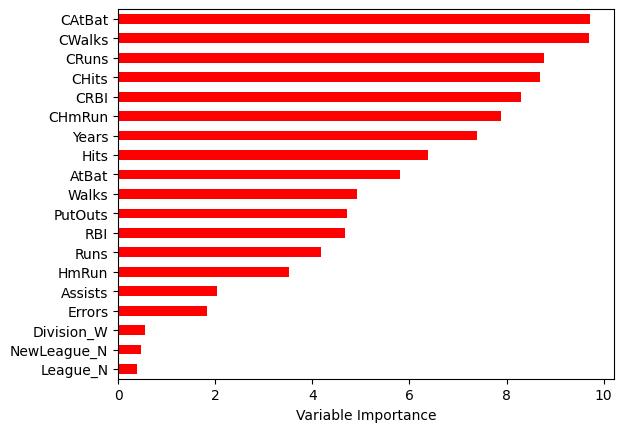

In [ ]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r')
                  
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

> # Gradient Boosting Machines

AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.

Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

**Boosting**

Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarma fikrine dayanır.

**Kötü Tahmin,** gerçek değerler ile tahmin edilen değerlerin farkının karelerinin alınması sonucunda ortaya çıkan büyük değerlerdir. Kötü tahminde bulunan ağaçlar da zayıf tahmincilerdir.

**Adaptive Boosting (AdaBoost)**

Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır.

*   Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
*   Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) oluşturur.
*   GBM diferansiyellenebilen herhangi bir kayıp fonksiyonu optimize edebilen Gradient descent algoritmasını kullanmakta.
*   GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines...)
*   Cost fonksiyonları ve link fonksiyonları modifiye edilebilirler.
*   Boosting + Gradient Descent

**Model ve Tahmin**




In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [5]:
gbm_model

GradientBoostingRegressor()

In [7]:
y_pred = gbm_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

352.83619328423396

**Model Tuning**

In [15]:
gbm_params = {"learning_rate" : [0.001, 0.1, 0.01],
              "max_depth" : [3, 5, 8],
              "n_estimators" : [100, 200, 500],
              "subsample" : [1, 0.5, 0.8]}

In [16]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [17]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [18]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.5}

In [19]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1, 
                                      max_depth = 8,
                                      n_estimators = 200,
                                      subsample = 0.5).fit(X_train, y_train)

In [20]:
y_pred = gbm_tuned.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred))

325.1064873207339

In [22]:
#değişken önem düzeyleri

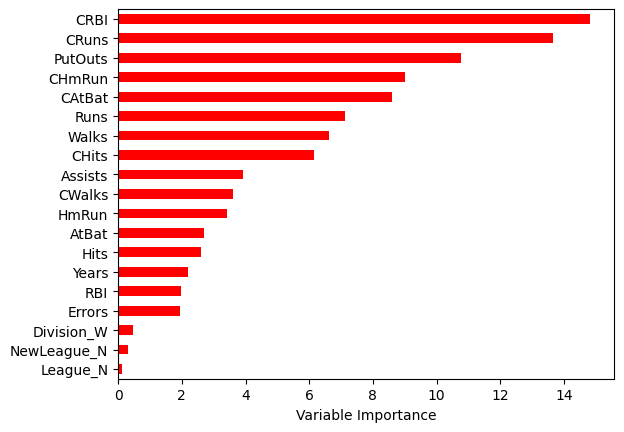

In [25]:
Importance = pd.DataFrame({'Importance' : gbm_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r')
                       
plt.xlabel('Variable Importance')   
plt.gca().legend_ = None                    

> # eXtreme Gradient Boosting (XGBoost)

XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş, ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.

* R, Pyhton, Hadoop, Scala, Julia ile kullanılabilir.
* Ölçeklenebilirdir.
* Hızlıdır.
* Tahmin başarısı yüksektir.
* Bir çok kaggle yarışmasında başarısını kanıtlamıştır.

**Tahmin ve Model**



In [17]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import xgboost

In [21]:
from xgboost import XGBRegressor

In [29]:
xgb = XGBRegressor().fit(X_train, y_train)

In [30]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
y_pred = xgb.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

**Model Tuning**

In [33]:
xgb_params = {"learning_rate" : [0.1, 0.01, 0.05],
              "max_depth" : [2, 5, 8],
              "n_estimators" : [100, 500, 100],
              "colesample_bytree" : [0.4, 0.7]}

In [34]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[10:10:28] WARNING: ../src/learner.cc:767: 
Parameters: { "colesample_bytree" } are not used.



In [35]:
xgb_cv_model.best_params_

{'colesample_bytree': 0.4,
 'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 500}

In [38]:
xgb_tuned = XGBRegressor(learning_rate = 0.05,
                         max_depth = 2, 
                         n_estimators = 500).fit(X_train, y_train)

In [39]:
y_pred = xgb_tuned.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test, y_pred))

349.31496653374205

> # Light GBM

Light GBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

* Daha performanslı
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi
* Breadth-first search (BFS) yerine depth-first search (DFS)

**Model ve Tahmin**


In [4]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from lightgbm import LGBMRegressor

In [7]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [8]:
y_pred = lgb_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

In [10]:
lgbm_params = {"learning_rate" : [0.01, 0.1, 1],
               "max_depth" : [1,5,10],
               "n_estimators" : [20, 40, 100, 200]}

In [11]:
lgbm_cv_model = GridSearchCV(lgb_model,
                             lgbm_params,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [12]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20}

In [14]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 10,
                           n_estimators = 20).fit(X_train, y_train)

In [16]:
y_pred = lgbm_tuned.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

> # CatBoost

Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevi.

* Kategorik değişken desteği
* Hızlı ve ölçeklenebilir GPU desteği
* Daha başarılı tahminler
* Hızlı train ve hızlı tahmin
* Rusyanın ilk açık kaynak kodlu, başarılı ML çalışması

**Model ve Tahmin**


In [14]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.6 MB/s eta 0:00:00


In [15]:
from catboost import CatBoostRegressor

In [ ]:
catb_model = CatBoostRegressor().fit(X_train, y_train)

In [21]:
y_pred = catb_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

**Model Tuning**

In [23]:
catb_params = {"iterations" : [200, 500, 1000],
               "learning_rate" : [0.01, 0.1],
               "depth" : [3, 6]}

In [24]:
catb_model = CatBoostRegressor()

In [ ]:
catb_cv_model = GridSearchCV(catb_model, 
                             catb_params,
                             cv = 5,
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

In [26]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [27]:
catb_tuned = CatBoostRegressor(depth = 3, 
                               iterations = 20,
                               learning_rate = 0.1).fit(X_train, y_train)

0:	learn: 425.7900818	total: 2.69ms	remaining: 51ms
1:	learn: 404.8723520	total: 5.05ms	remaining: 45.5ms
2:	learn: 387.4057666	total: 6.58ms	remaining: 37.3ms
3:	learn: 372.2801584	total: 8.31ms	remaining: 33.3ms
4:	learn: 358.9204229	total: 10.1ms	remaining: 30.2ms
5:	learn: 347.0083933	total: 11.8ms	remaining: 27.6ms
6:	learn: 336.0130818	total: 13.1ms	remaining: 24.3ms
7:	learn: 324.3923300	total: 14.9ms	remaining: 22.3ms
8:	learn: 314.8690957	total: 16.2ms	remaining: 19.8ms
9:	learn: 308.5075563	total: 17.8ms	remaining: 17.8ms
10:	learn: 298.8587285	total: 19.7ms	remaining: 16.1ms
11:	learn: 294.7655438	total: 21.2ms	remaining: 14.1ms
12:	learn: 288.0697862	total: 23.1ms	remaining: 12.4ms
13:	learn: 282.6697154	total: 24.4ms	remaining: 10.5ms
14:	learn: 277.6121667	total: 26.2ms	remaining: 8.73ms
15:	learn: 273.4383979	total: 28ms	remaining: 6.99ms
16:	learn: 269.1556201	total: 29.8ms	remaining: 5.27ms
17:	learn: 264.8098704	total: 31.3ms	remaining: 3.48ms
18:	learn: 261.6700768	t

In [28]:
y_pred = catb_tuned.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

377.95302209823143



> # Makine Öğrenmesi Görevlerinin Otomatikleşmesi





In [5]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [28]:
def compML(df, y, alg):

  #train-test
  y = df[y]
  X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
  X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
  X_train, X_test, y_train, y_test = train_test_split(X, 
                                                      y, 
                                                      test_size = 0.25, 
                                                      random_state = 42)
  
  #modelleme
  model = alg().fit(X_train, y_train)
  y_pred = model.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  model_ismi = alg.__name__
  print(model_ismi, ":", RMSE)

In [11]:
compML(df, "Salary", LGBMRegressor)

363.8712087611089

In [12]:
compML(df, "Salary", SVR)

460.0032657244849

In [22]:
models = [LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR]

In [30]:
for i in models:
  compML(df, "Salary", i)

LGBMRegressor : 363.8712087611089
XGBRegressor : 355.46515176059927
GradientBoostingRegressor : 343.83158726354304
RandomForestRegressor : 336.65634505749114
DecisionTreeRegressor : 444.809069247609
MLPRegressor : 358.70135102141074
KNeighborsRegressor : 426.6570764525201
SVR : 460.0032657244849
